# Elijah Sartin and Richard Osborn
## DS160 Final Project Data Set
### Version 0.0.1

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Linear Regression (for comparison)
from sklearn.linear_model import LinearRegression

#Support Vector Machine
from sklearn import svm

#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve,  roc_auc_score

In [147]:
df=pd.read_csv('bank-additional.csv',sep=';')

In [148]:
print(df.shape)

(4119, 21)


In [149]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
517,51,management,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,4,failure,-1.8,93.876,-40.0,0.697,5008.7,no
2769,46,admin.,married,high.school,no,no,no,cellular,nov,mon,...,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
1649,36,blue-collar,single,basic.9y,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1275,20,student,single,high.school,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-3.4,92.649,-30.1,0.715,5017.5,no
2160,62,retired,single,university.degree,no,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,no


In [150]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [151]:
df.columns#need to change cons.price.idx

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

We are dropping columns that we were not going to be using for testing, this will allow our data to proccess faster and clean the data.

In [152]:
df.drop(df.columns[[12,14,15,17,18,19]], axis = 1, inplace = True) 
#pdays,poutcome,emp.var.ratecons.conf.idx, euribor3m, nr.employed

In [153]:
df.rename(columns={"cons.price.idx":"cpi"},inplace=True)


In [154]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'cpi', 'y'],
      dtype='object')

In [176]:
print(df.shape)

(4119, 15)


In [179]:
age=df.age.groupby(df.age).count()

Text(0, 0.5, 'Number of Clients')

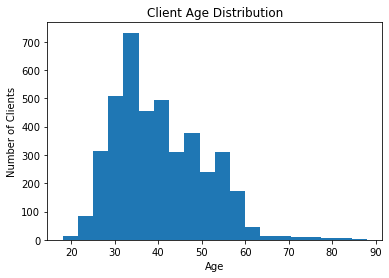

In [180]:
plt.hist(df.age,bins=20) #Kinda normal 
plt.title('Client Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')

In [181]:
duration=df.duration.groupby(df.duration).count()

Text(0, 0.5, 'Number of Clients')

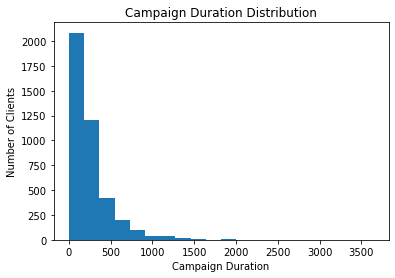

In [182]:
plt.hist(df.duration,bins=20) #skewed, maybe bound ?
plt.title('Campaign Duration Distribution')
plt.xlabel('Campaign Duration')
plt.ylabel('Number of Clients')

In [183]:
campaign=df.campaign.groupby(df.campaign).count()

Text(0, 0.5, 'Number of Clients')

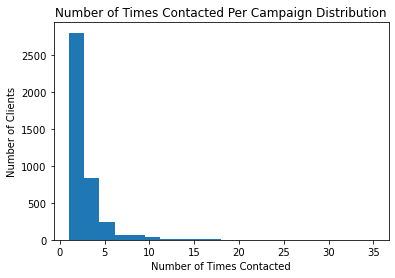

In [185]:
plt.hist(df.campaign,bins=20) #skewed, maybe bound?
plt.title('Number of Times Contacted Per Campaign Distribution')
plt.xlabel('Number of Times Contacted')
plt.ylabel('Number of Clients')

In [48]:
job=df.job.groupby(df.job).count()

<BarContainer object of 12 artists>

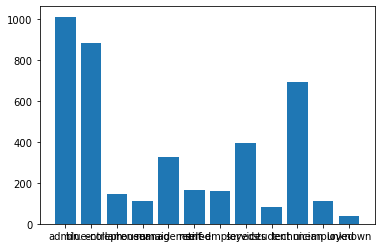

In [83]:
plt.bar(job.index,job.values) #maybe landscape

In [51]:
marital=df.marital.groupby(df.marital).count()

<BarContainer object of 4 artists>

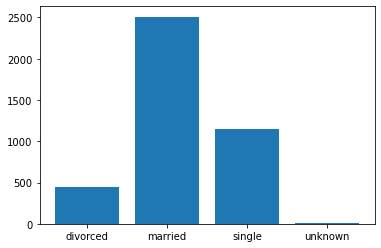

In [66]:
plt.bar(marital.index,marital.values)

In [53]:
education=df.education.groupby(df.education).count()

<BarContainer object of 8 artists>

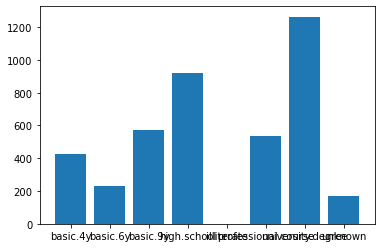

In [64]:
plt.bar(education.index,education.values)# maybe landscape

In [62]:
default=df.default.groupby(df.default).count()

<BarContainer object of 3 artists>

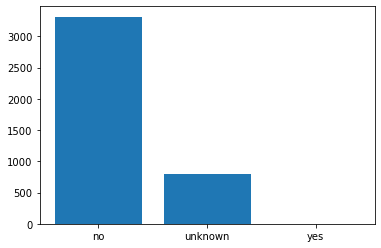

In [65]:
plt.bar(default.index,default.values)

In [68]:
housing=df.housing.groupby(df.housing).count()

<BarContainer object of 3 artists>

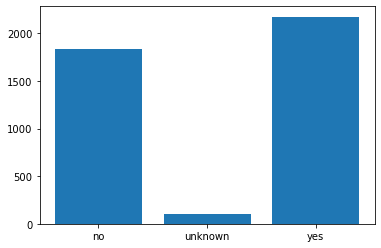

In [69]:
plt.bar(housing.index,housing.values)

In [70]:
loan=df.loan.groupby(df.loan).count()

<BarContainer object of 3 artists>

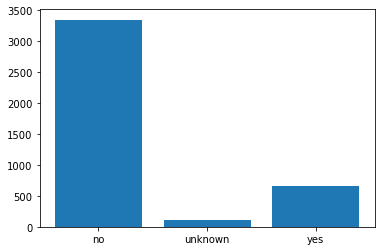

In [71]:
plt.bar(loan.index,loan.values)

In [72]:
contact=df.contact.groupby(df.contact).count()

<BarContainer object of 2 artists>

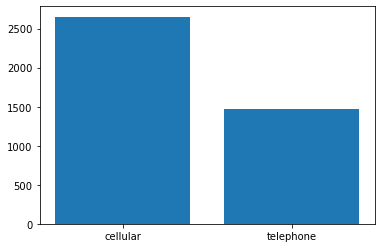

In [73]:
plt.bar(contact.index,contact.values)

In [75]:
month=df.month.groupby(df.month).count()

<BarContainer object of 10 artists>

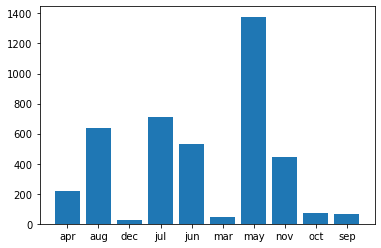

In [76]:
plt.bar(month.index,month.values)

In [79]:
day_of_week=df.day_of_week.groupby(df.day_of_week).count()

<BarContainer object of 5 artists>

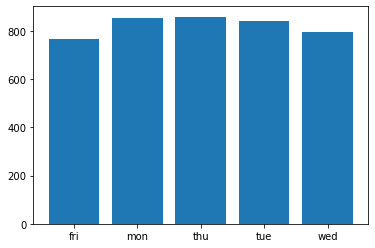

In [80]:
plt.bar(day_of_week.index,day_of_week.values)#lazy friday

In [81]:
y=df.y.groupby(df.y).count()

<BarContainer object of 2 artists>

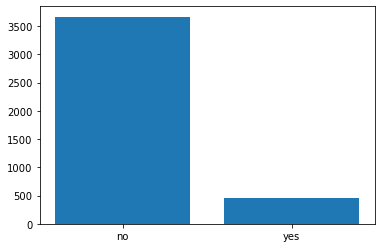

In [82]:
plt.bar(y.index,y.values)

In [169]:
previous=df.y.groupby(df.previous).count()

Text(0, 0.5, 'Number of Clients')

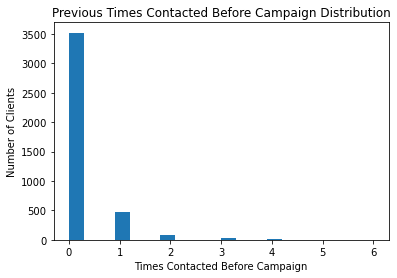

In [170]:
plt.hist(df.previous,bins=20)
plt.title('Previous Times Contacted Before Campaign Distribution')
plt.xlabel('Times Contacted Before Campaign')
plt.ylabel('Number of Clients')

In [171]:
cpi=df.cpi.groupby(df.cpi).count()

Text(0, 0.5, 'Number of Clients')

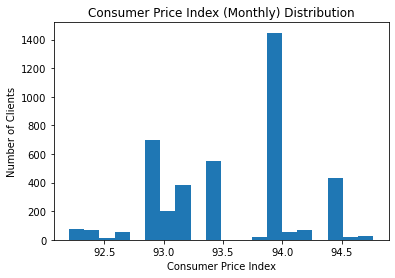

In [172]:
#Compares prices to inflation. 100 means that they experienced no inflation compared to the base year(can't find).
#Less than 100 implies that the inflation was negative, increasing the value of the consumers dollar's. 
#They are all different because people pay and make different incomes.
plt.hist(df.cpi,bins=20) 
plt.title('Consumer Price Index (Monthly) Distribution')
plt.xlabel('Consumer Price Index')
plt.ylabel('Number of Clients')

In [165]:
default #1 default lmao, why and who?

default
no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [173]:
cpi #92.201-94.767

cpi
92.201     75
92.379     25
92.431     43
92.469     14
92.649     36
92.713     21
92.756      1
92.843     25
92.893    597
92.963     75
93.075    201
93.200    386
93.369     23
93.444    528
93.749     14
93.798      6
93.876     23
93.918    667
93.994    758
94.027     33
94.055     24
94.199     39
94.215     30
94.465    431
94.601     20
94.767     24
Name: cpi, dtype: int64

In [186]:
 campaign #1-35

campaign
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
13      11
14       6
15       2
16       7
17      14
18       1
19       2
22       2
23       2
24       1
27       1
29       2
35       1
Name: campaign, dtype: int64

In [187]:
duration #0-2000

duration
0       1
4       1
5       4
6       5
7       4
       ..
1980    1
2301    1
2653    1
3253    1
3643    1
Name: duration, Length: 828, dtype: int64

In [188]:
df.describe()

,age,duration,campaign,previous,cpi
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,0.190337,93.579704
std,10.313362,254.703736,2.568159,0.541788,0.579349
min,18.000000,0.000000,1.000000,0.000000,92.201000
25%,32.000000,103.000000,1.000000,0.000000,93.075000
50%,38.000000,181.000000,2.000000,0.000000,93.749000
75%,47.000000,317.000000,3.000000,0.000000,93.994000
max,88.000000,3643.000000,35.000000,6.000000,94.767000
